In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [16]:
water = pd.read_csv("C:/Users/aarju/Desktop/deep learning/water_potability.csv")
water.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [20]:
water = water.replace(np.NaN,0)
water.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0.000000,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,0.000000,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,0.000000,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [21]:
water.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,6.019540,196.369496,22014.092526,7.122277,254.203468,426.205111,14.284970,63.112960,3.966786,0.390110
std,2.924207,32.879761,8768.570828,1.583085,146.765192,80.824064,3.308162,21.353531,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,0.000000,181.483754,2.200000,0.000000,1.450000,0.000000
25%,5.283146,176.850538,15666.690297,6.127421,240.722848,365.734414,12.065801,53.793688,3.439711,0.000000
50%,6.735249,196.967627,20927.833607,7.130299,318.660382,421.884968,14.218338,65.445962,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


c:\users\aarju\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Potability', ylabel='count'>

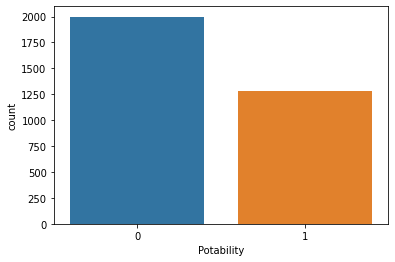

In [42]:
sb.countplot(water['Potability'],data = water)

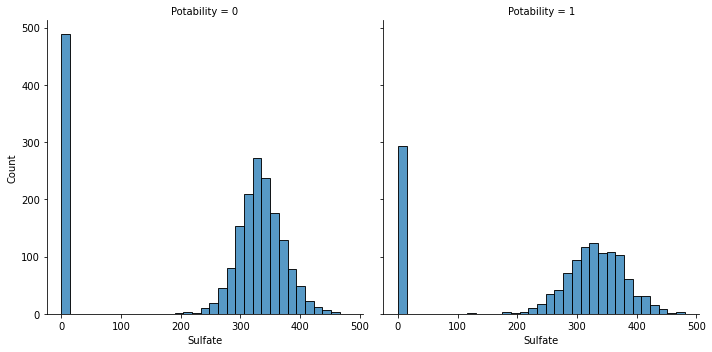

In [174]:
sb.displot(data=water,x=water['Sulfate'],col=water['Potability'],kind='hist')

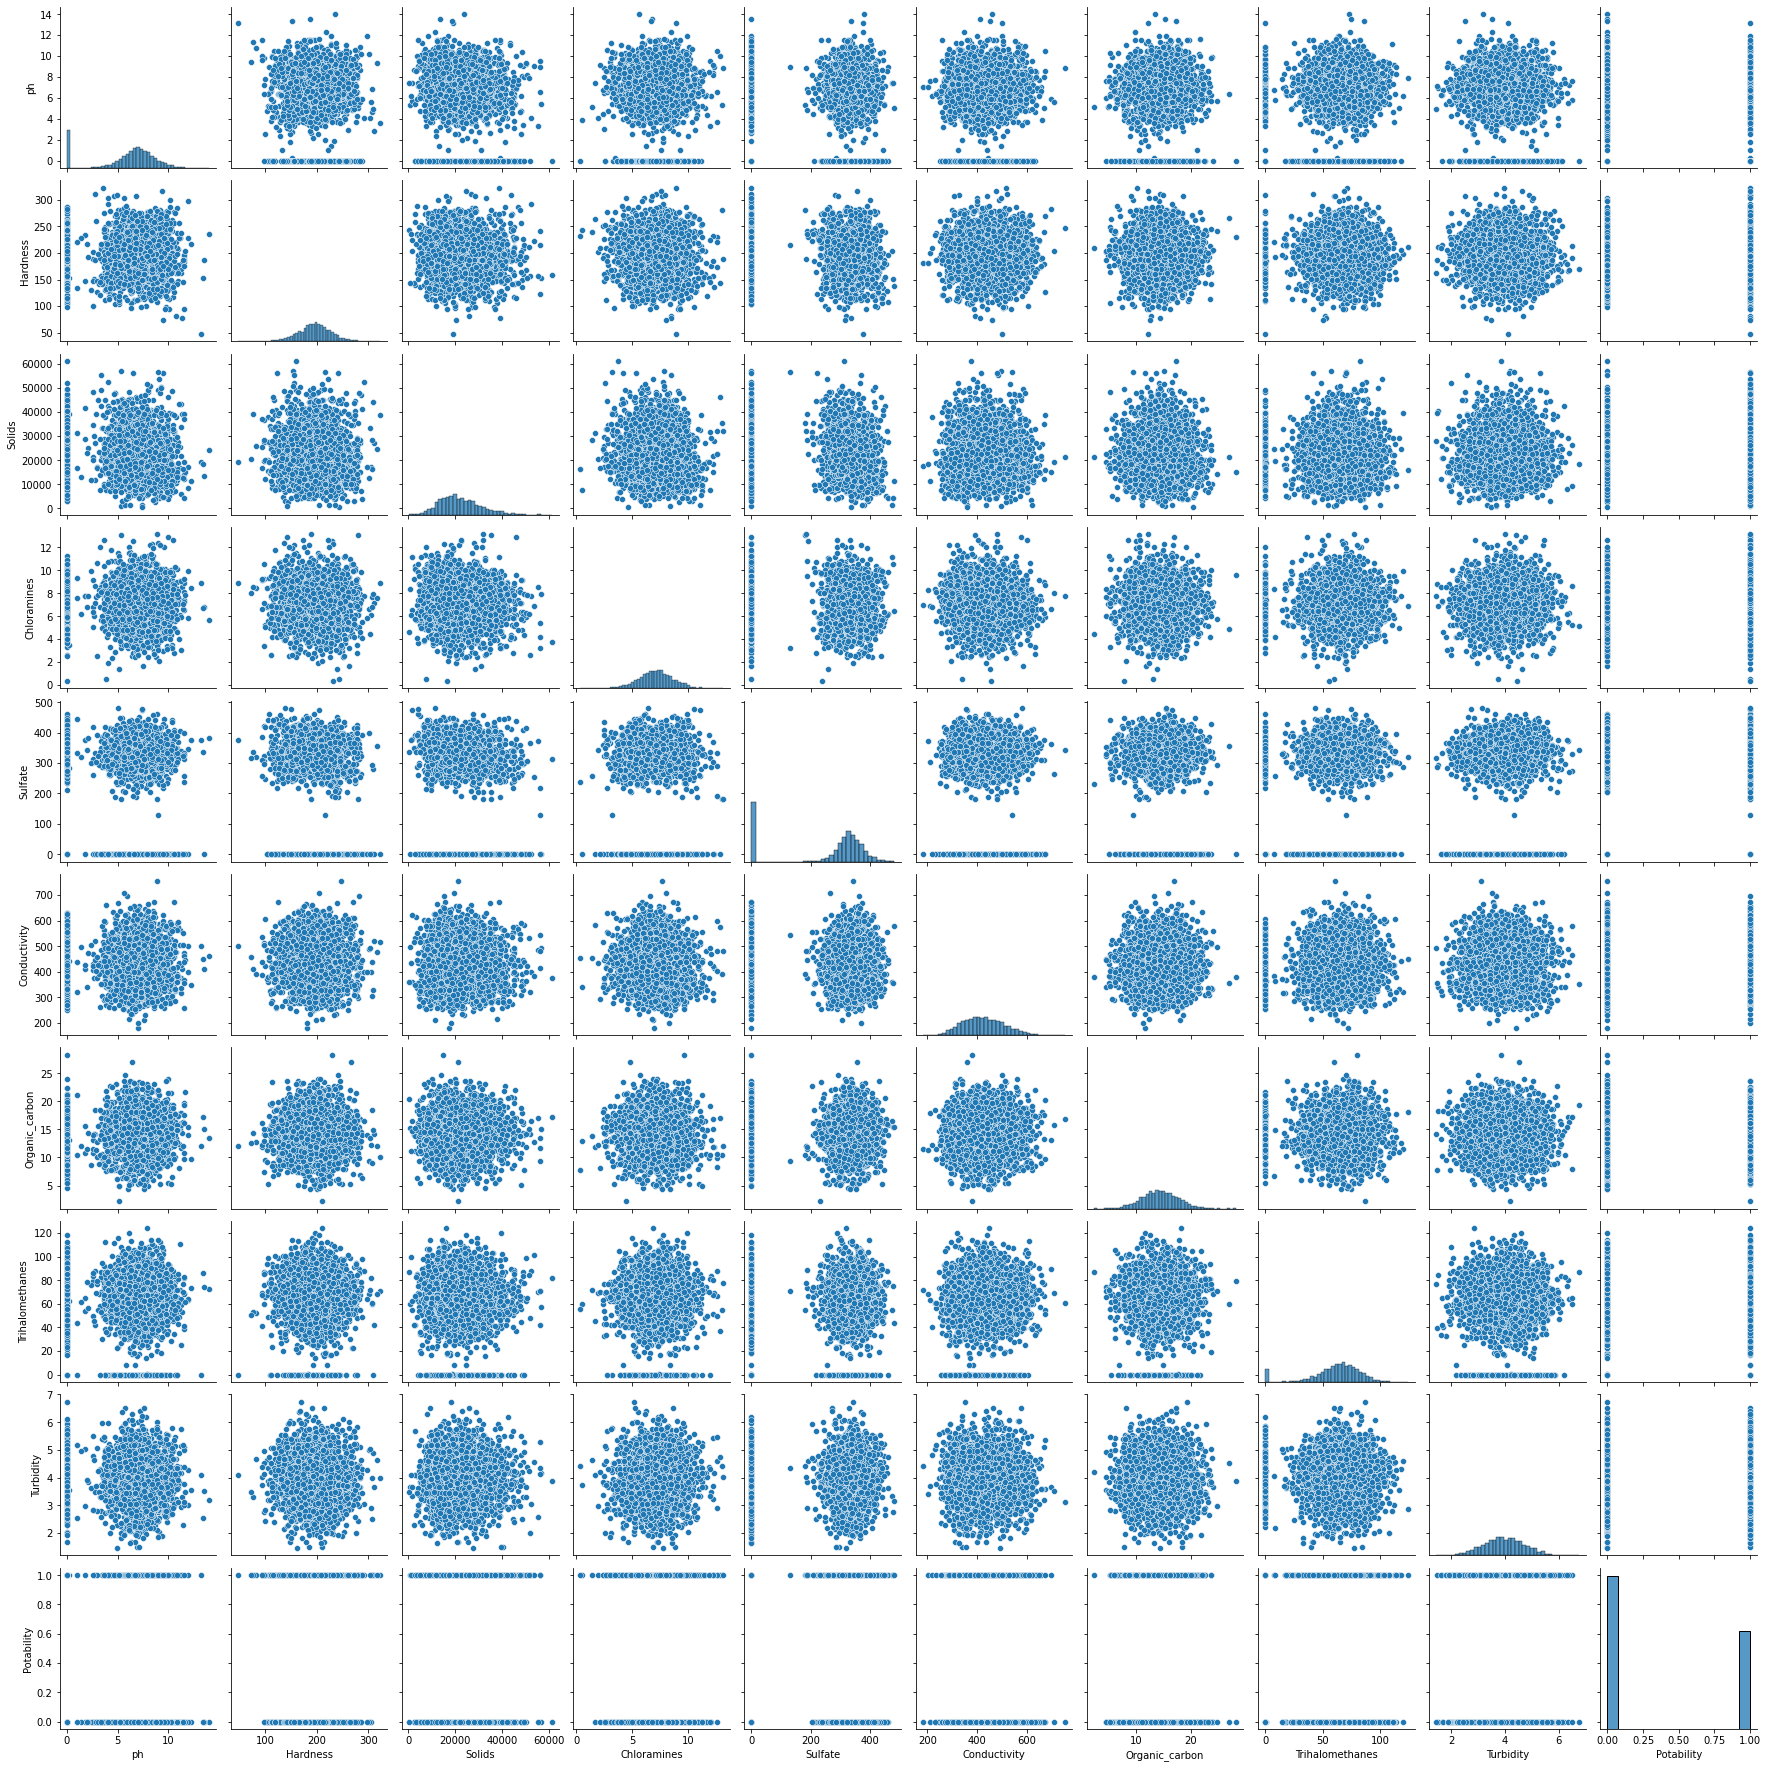

In [185]:
sb.pairplot(water)

<AxesSubplot:>

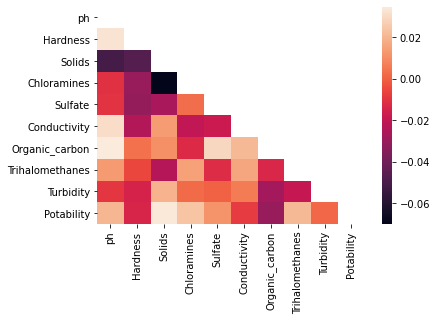

In [176]:
corr = water.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sb.heatmap(corr,mask=mask)

In [94]:
input_data = water.iloc[:,0:8].values
output = water.iloc[:,9].values

In [138]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_output, test_output = train_test_split(input_data,output,test_size=0.2)

In [177]:
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,plot_confusion_matrix

feature = SelectKBest(score_func=f_classif,k=6)
new_train_input = feature.fit_transform(train_input,train_output)
model = DecisionTreeClassifier(max_depth=35)
model.fit(new_train_input,train_output)
new_test_input = feature.transform(test_input)
pred = model.predict(new_test_input)

In [178]:
print("Accuracy on Training Set:",model.score(new_train_input,train_output))
print("Accuracy on Testing Set:",accuracy_score(test_output,pred))
target_names = ["Non Potable","Potable"]
print(classification_report(test_output,pred,target_names=target_names))

Accuracy on Training Set: 1.0
Accuracy on Testing Set: 0.5625
              precision    recall  f1-score   support

 Non Potable       0.62      0.64      0.63       379
     Potable       0.48      0.46      0.47       277

    accuracy                           0.56       656
   macro avg       0.55      0.55      0.55       656
weighted avg       0.56      0.56      0.56       656



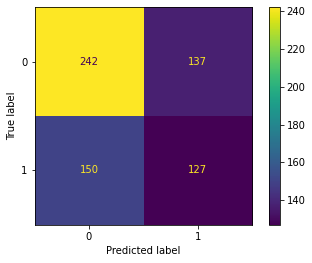

In [182]:
tn, fp, fn, tp = confusion_matrix(test_output,pred).ravel()
tn, fp, fn, tp

plot_confusion_matrix(model,new_test_input,test_output)